In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# %config InlineBackend.figure_formats = ['svg']
sns.set(style="white", context='poster')
import math

In [76]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [77]:
import seaborn_figure_settings

In [78]:
import os
save_dpath = os.path.join('../notebooks/figures/', 'biogeo')
os.makedirs(save_dpath,exist_ok=True)

In [79]:
import sys
sys.path.append('..')
from model_equations_separate_NC_store_numba import *


In [80]:
morder = ['OVERFLOW', 'EXOENZYME',  'ROS',]
media_order = ['lowN', 'pro99']
mpalette = [ '#426b69', '#9b7874', '#b191ff', '#84dcc6',]# '#d6d4a0',]
sns.color_palette(mpalette)

[(0.25882352941176473, 0.4196078431372549, 0.4117647058823529),
 (0.6078431372549019, 0.47058823529411764, 0.4549019607843137),
 (0.6941176470588235, 0.5686274509803921, 1.0),
 (0.5176470588235295, 0.8627450980392157, 0.7764705882352941)]

In [81]:
morder1 = morder[:-1]
mpalette1 = mpalette[:-1]

In [82]:
gorder = [ 'Strong', 'Sustained', 'Inhibited', 'Weak', 'Neutral',   'Other']
gpalette = sns.color_palette('Set2', n_colors=4).as_hex() + ['black', 'lightgrey']
gpalette = ['#882255', '#CC6677', '#332288', 
             '#44AA99','#88CCEE',
            '#D0CFCA',  ]

sns.color_palette(gpalette)

[(0.5333333333333333, 0.13333333333333333, 0.3333333333333333),
 (0.8, 0.4, 0.4666666666666667),
 (0.2, 0.13333333333333333, 0.5333333333333333),
 (0.26666666666666666, 0.6666666666666666, 0.6),
 (0.5333333333333333, 0.8, 0.9333333333333333),
 (0.8156862745098039, 0.8117647058823529, 0.792156862745098)]

In [83]:
gorder1 = ['Strong', 'Sustained', 'Weak','Inhibited',  ]
gpalette1 = gpalette[:2] + [gpalette[3], gpalette[2], ]
sns.color_palette(gpalette1)

[(0.5333333333333333, 0.13333333333333333, 0.3333333333333333),
 (0.8, 0.4, 0.4666666666666667),
 (0.26666666666666666, 0.6666666666666666, 0.6),
 (0.2, 0.13333333333333333, 0.5333333333333333)]

In [84]:

HCOLOR = '#ffc58f'
HCOLOR_light = '#ffd2a9'
PCOLOR = '#99cc99'
PCOLOR_light = '#aad5aa'

DONCOLOR = '#7285b7'
RDONCOLOR = 'black' #'#00334D'
DINCOLOR = '#bbdaff' #'#000066'

DOCCOLOR = '#cc6666'
RDOCCOLOR = 'black' #'#00334D'
DICCOLOR = '#ff9da4' #'#000066'

SHCOLOR = '#ffa98f'
SPCOLOR = '#326232'


ccnpalette = [PCOLOR, PCOLOR_light, HCOLOR, HCOLOR_light, SPCOLOR, SHCOLOR,DONCOLOR, RDONCOLOR, DINCOLOR]
ccnorder = ['Bp', 'Np', 'Bh','Nh',  'ABp', 'ABh', 'DON', 'RDON', 'DIN', ]
cccpalette = [PCOLOR, PCOLOR_light, HCOLOR, HCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
cccorder = ['Bp[C]', 'Cp', 'Bh[C]', 'Ch', 'ABp[C]', 'ABh[C]', 'DOC', 'RDOC', 'DIC']
ccxpalette = [PCOLOR, HCOLOR]
ccxorder = ['Xp', 'Xh']
hnpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
hnorder = [ 'Bh', 'ABp', 'ABh', 'DON', 'RDON', 'DIN']
hcpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
hcorder = [ 'Bh[C]', 'ABp[C]', 'ABh[C]', 'DOC', 'RDOC', 'DIC']
pnpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
pnorder = [ 'Bp', 'ABp', 'ABh', 'DON', 'RDON', 'DIN']
pcpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
pcorder = [ 'Bp[C]', 'ABp[C]', 'ABh[C]', 'DOC', 'RDOC', 'DIC']
sns.color_palette(ccnpalette + cccpalette, )
# 


[(0.6, 0.8, 0.6),
 (0.6666666666666666, 0.8352941176470589, 0.6666666666666666),
 (1.0, 0.7725490196078432, 0.5607843137254902),
 (1.0, 0.8235294117647058, 0.6627450980392157),
 (0.19607843137254902, 0.3843137254901961, 0.19607843137254902),
 (1.0, 0.6627450980392157, 0.5607843137254902),
 (0.4470588235294118, 0.5215686274509804, 0.7176470588235294),
 (0.0, 0.0, 0.0),
 (0.7333333333333333, 0.8549019607843137, 1.0),
 (0.6, 0.8, 0.6),
 (0.6666666666666666, 0.8352941176470589, 0.6666666666666666),
 (1.0, 0.7725490196078432, 0.5607843137254902),
 (1.0, 0.8235294117647058, 0.6627450980392157),
 (0.19607843137254902, 0.3843137254901961, 0.19607843137254902),
 (1.0, 0.6627450980392157, 0.5607843137254902),
 (0.8, 0.4, 0.4),
 (0.0, 0.0, 0.0),
 (1.0, 0.615686274509804, 0.6431372549019608)]

In [85]:
ccnorder = ['Bp', 'Np','Bh',  'Nh', 'DIN','DON',  'RDON', ]
ccnpalette = [PCOLOR, PCOLOR_light, HCOLOR, HCOLOR_light,DINCOLOR, DONCOLOR, RDONCOLOR, ]

#Hex Codes: #262842, #293961, #2C497F, #8897BD, #E3E4FA
#Hex Codes: #49593C, #945C39, #DF5F35, #EF9E84, #FFE3D1
#Hex Codes: #5E1525, #C74F29, #E99E46, #B6C38D, #828144
ccnpalette = ['#2F6755', '#98A69A', '#7d5c54', '#E7BB96', '#262842', '#2C497F', '#8897BD']
#ccnpalette = ['#828144', '#B6C38D', '#E99E46', '#E7BB96', '#262842', '#2C497F', '#8897BD']
cccorder = ['Bp[C]', 'Cp','Bh[C]',  'Ch', 'DIC','DOC',  'RDOC', ]
cccpalette = [PCOLOR, PCOLOR_light, HCOLOR, HCOLOR_light,DICCOLOR, DOCCOLOR, RDOCCOLOR, ]
#Hex Codes: #49593C, #945C39, #DF5F35, #EF9E84, #FFE3D1
cccpalette = ['#2F6755', '#98A69A', '#7d5c54', '#E7BB96', '#DF5F35', '#EF9E84', '#ffd8d1']

sns.color_palette(cccpalette)

[(0.1843137254901961, 0.403921568627451, 0.3333333333333333),
 (0.596078431372549, 0.6509803921568628, 0.6039215686274509),
 (0.49019607843137253, 0.3607843137254902, 0.32941176470588235),
 (0.9058823529411765, 0.7333333333333333, 0.5882352941176471),
 (0.8745098039215686, 0.37254901960784315, 0.20784313725490197),
 (0.9372549019607843, 0.6196078431372549, 0.5176470588235295),
 (1.0, 0.8470588235294118, 0.8196078431372549)]

In [86]:

 
sns.color_palette([PCOLOR, HCOLOR, PCOLOR_light, HCOLOR_light] )


[(0.6, 0.8, 0.6),
 (1.0, 0.7725490196078432, 0.5607843137254902),
 (0.6666666666666666, 0.8352941176470589, 0.6666666666666666),
 (1.0, 0.8235294117647058, 0.6627450980392157)]

In [87]:
dpath = '../results/rerun_sensitivity_init/biogeo/'

In [88]:
dpath

'../results/rerun_sensitivity_init/biogeo/'

In [89]:
os.listdir(dpath)

['biogeo_rerun_het_CP13_init.csv.gz',
 'biogeo_rerun_het_BP05_init.csv.gz',
 'biogeo_rerun_het_DIN800DOC2500_init.csv.gz',
 'biogeo_rerun_het_DOC2500_init.csv.gz',
 'biogeo_rerun_het_DIN800_init.csv.gz',
 'biogeo_rerun_het_BP14_init.csv.gz',
 'biogeo_rerun_het_DOC160_init.csv.gz',
 'biogeo_rerun_het_DIN800DOC160_init.csv.gz']

In [117]:
fnames = [
 'biogeo_rerun_het_DIN800DOC2500_init.csv.gz',
 'biogeo_rerun_het_DOC2500_init.csv.gz',
 'biogeo_rerun_het_DIN800_init.csv.gz',
 'biogeo_rerun_het_DOC160_init.csv.gz',
 'biogeo_rerun_het_DIN800DOC160_init.csv.gz']
def _readvfile(fname):
    category = fname.replace(dpath,'').replace('biogeo_rerun_het_','').replace('_init.csv.gz','')
    print (fname, category)
    df = pd.read_csv(fname)
    df['Category'] = category
    return df
comb_df = pd.concat([_readvfile(os.path.join(dpath,f)) for f in fnames], ignore_index=True)


../results/rerun_sensitivity_init/biogeo/biogeo_rerun_het_DIN800DOC2500_init.csv.gz DIN800DOC2500
../results/rerun_sensitivity_init/biogeo/biogeo_rerun_het_DOC2500_init.csv.gz DOC2500
../results/rerun_sensitivity_init/biogeo/biogeo_rerun_het_DIN800_init.csv.gz DIN800
../results/rerun_sensitivity_init/biogeo/biogeo_rerun_het_DOC160_init.csv.gz DOC160
../results/rerun_sensitivity_init/biogeo/biogeo_rerun_het_DIN800DOC160_init.csv.gz DIN800DOC160


In [118]:
orig_dpath = '../results/final/het'
orig_comb_df = pd.read_csv(os.path.join(orig_dpath, 'integrated_last_core_models_versatile_het.csv.gz'))
orig_comb_df['Category'] = 'Original'

In [119]:
comb_df = pd.concat([comb_df, orig_comb_df], ignore_index=True).copy()

In [120]:
media_order = ['Original',
               'DOC160', 'DOC2500', 'DIN800DOC160',  'DIN800', 'DIN800DOC2500',  ]

In [121]:
DEFAULT_DOC = 20
DEFAULT_DIN = 100
docmap ={
    'Original' : DEFAULT_DOC,
    'DOC160' : 160,
    'DOC2500' : 2500, 
    'DIN800DOC160' : 160,  
    'DIN800' : DEFAULT_DOC, 
    'DIN800DOC2500' : 2500,
}
dinmap ={
    'Original' : DEFAULT_DIN,    
    'DOC160' : DEFAULT_DIN,
    'DOC2500' : DEFAULT_DIN, 
    'DIN800DOC160' : 800,  
    'DIN800' : 800, 
    'DIN800DOC2500' :800,
}


In [122]:
comb_df['DOC'] = comb_df['Category'].map(docmap)
comb_df['DIN'] = comb_df['Category'].map(dinmap)

In [123]:
comb_df.columns

Index(['model', 'Phase', 'VPRO', 'Versatile', 'run_id', 'y_pred', 'Sample',
       'max_prob', 'Bp Final', 'Np Final',
       ...
       'deathC_DOCh Integrated', 'deathN_DONp Integrated',
       'deathN_DONh Integrated', 'PP', 'Total N uptake', 'PP / total fixed C',
       'N reuse', 'Category', 'DOC', 'DIN'],
      dtype='object', length=128)

In [124]:
def _change_col(c):
    suffixes = ('Integrated','Final')
    for suffix in suffixes:
        s = f' {suffix}'
        if c.endswith(s):
            c = c.replace(s, '')
            c= f'{suffix} {c}'
            return c
    return c
comb_df.rename(columns={c:_change_col(c) for c in comb_df.columns}, inplace=True)


In [125]:
list(comb_df.columns)

['model',
 'Phase',
 'VPRO',
 'Versatile',
 'run_id',
 'y_pred',
 'Sample',
 'max_prob',
 'Final Bp',
 'Final Np',
 'Final Cp',
 'Final Bh',
 'Final Nh',
 'Final Ch',
 'Final DON',
 'Final RDON',
 'Final DIN',
 'Final DOC',
 'Final RDOC',
 'Final DIC',
 'Final ROS',
 't',
 'day',
 'Final gross_uptakeINp',
 'Final gross_uptakeINh',
 'Final gross_uptakeONp',
 'Final gross_uptakeONh',
 'Final gross_uptakeICp',
 'Final gross_uptakeICh',
 'Final gross_uptakeOCp',
 'Final gross_uptakeOCh',
 'uptakeNp',
 'uptakeNh',
 'uptakeCp',
 'uptakeCh',
 'QCp',
 'QCh',
 'biosynthesisNp',
 'biosynthesisNh',
 'Final respirationCp',
 'Final respirationCh',
 'biomass_breakdownCp',
 'biomass_breakdownCh',
 'Final overflowNp',
 'Final overflowNh',
 'Final overflowCp',
 'Final overflowCh',
 'Final ROSproductionp',
 'Final ROSproductionh',
 'Final ROSlossp',
 'Final ROSlossh',
 'deathbiomassNp',
 'deathbiomassNh',
 'deathstoreNp',
 'deathstoreNh',
 'deathstoreCp',
 'deathstoreCh',
 'DON2DIN_exop',
 'Final DON2DI

In [126]:
comb_df['Final Organic C'] = comb_df[['Final DOC', 'Final RDOC', 'Final Bptotal[C]', 'Final Bhtotal[C]', ]].sum(axis=1)
comb_df['Integrated N uptake'] = comb_df[['Integrated gross_uptakeINp', 'Integrated gross_uptakeONp', 
                                          'Integrated gross_uptakeINh', 'Integrated gross_uptakeONh',  ]].sum(axis=1)

comb_df['Integrated C Biomassp'] = comb_df['Integrated Bptotal[C]']
comb_df['Integrated C Biomassh'] = comb_df['Integrated Bhtotal[C]']
comb_df['Integrated N Biomassp'] = comb_df['Integrated Bptotal[N]']
comb_df['Integrated N Biomassh'] = comb_df['Integrated Bhtotal[N]']



In [127]:
comb_df['Final Het/Pro'] = comb_df['Final Bhtotal[N]'].div(comb_df['Final Bptotal[N]'])

In [128]:
value_cols = [
 'Final DON',
 'Final RDON',
 'Final DIN',
 'Final DOC',
 'Final RDOC',
 'Final DIC',
 'Final ROS',

 'Integrated DON',
 'Integrated RDON',
 'Integrated DIN',
 'Integrated DOC',
 'Integrated RDOC',
 'Integrated DIC',
 'Integrated ROS',

 'Integrated Uptake INp',
 'Integrated Uptake INh',
 'Integrated Uptake ONp',
 'Integrated Uptake ONh',
 'Integrated Uptake ICp',
 'Integrated Uptake ICh',
 'Integrated Uptake OCp',
 'Integrated Uptake OCh',
 'Integrated overflowNp',
 'Integrated overflowNh',
 'Integrated overflowCp',
 'Integrated overflowCh',
 'Integrated ROSproductionp',
 'Integrated ROSproductionh',
 'Integrated ROSlossp',
 'Integrated ROSlossh',
 'Integrated DON2DIN_exoh',
 'Integrated additionalLossRatep',
 'Integrated additionalLossRateh',
 'Integrated deathC_DOCp',
 'Integrated deathC_DOCh',
 'Integrated deathN_DONp',
 'Integrated deathN_DONh',
 'N reuse',
 'Final Organic C',
 'Integrated N uptake',
 'Integrated C Biomassp',
 'Integrated C Biomassh',
 'Integrated N Biomassp',
 'Integrated N Biomassh'
]



In [129]:

for i in [
    'Integrated DON',
 'Integrated RDON',
 'Integrated DIN',
 'Integrated DOC',
 'Integrated RDOC',
 'Integrated DIC',
 'Integrated ROS',
  'Integrated C Biomassp',
 'Integrated C Biomassh',
 'Integrated N Biomassp',
 'Integrated N Biomassh'   
]:
    comb_df[i] = comb_df[i].div(comb_df.t) 

In [130]:
comb_df.rename(columns={c: c.replace('gross_uptake', 'Uptake ') for c in comb_df.columns}, inplace=True)

In [131]:
mcomb_df = comb_df.melt(
    id_vars=['Category', 'DOC', 'DIN','model', 'run_id', 'y_pred', ],
    value_vars=value_cols
    #var_name='intergrated',
    
)

In [132]:
mcomb_df.variable.unique()

array(['Final DON', 'Final RDON', 'Final DIN', 'Final DOC', 'Final RDOC',
       'Final DIC', 'Final ROS', 'Integrated DON', 'Integrated RDON',
       'Integrated DIN', 'Integrated DOC', 'Integrated RDOC',
       'Integrated DIC', 'Integrated ROS', 'Integrated Uptake INp',
       'Integrated Uptake INh', 'Integrated Uptake ONp',
       'Integrated Uptake ONh', 'Integrated Uptake ICp',
       'Integrated Uptake ICh', 'Integrated Uptake OCp',
       'Integrated Uptake OCh', 'Integrated overflowNp',
       'Integrated overflowNh', 'Integrated overflowCp',
       'Integrated overflowCh', 'Integrated ROSproductionp',
       'Integrated ROSproductionh', 'Integrated ROSlossp',
       'Integrated ROSlossh', 'Integrated DON2DIN_exoh',
       'Integrated additionalLossRatep', 'Integrated additionalLossRateh',
       'Integrated deathC_DOCp', 'Integrated deathC_DOCh',
       'Integrated deathN_DONp', 'Integrated deathN_DONh', 'N reuse',
       'Final Organic C', 'Integrated N uptake', 'Integrated

In [133]:
mcomb_df['variable1'] = mcomb_df.variable.str[:-1]
mcomb_df['Strain'] = mcomb_df.variable.str[-1].map({'p' : 'PRO', 'P': 'PRO', 'h': 'HET', 'H': 'HET'})
#mcomb_df.loc[mcomb_df.variable.str.startswith('Bp'), 'Strain'] = 'PRO'
#mcomb_df.loc[mcomb_df.variable.str.startswith('Bh'), 'Strain'] = 'HET'


In [134]:
#mcomb_df
#mcomb_df.variable.str.split(' ', expand=True, n=1)
mcomb_df['assay'] = mcomb_df.variable.str.split(' ', expand=True, n=1)[0]

In [135]:
mcomb_df.Strain.value_counts(dropna=False)

Strain
NaN    2190484
HET    1803928
PRO    1675076
Name: count, dtype: int64

In [136]:
mcomb_df.variable1.unique()

array(['Final DO', 'Final RDO', 'Final DI', 'Final RO', 'Integrated DO',
       'Integrated RDO', 'Integrated DI', 'Integrated RO',
       'Integrated Uptake IN', 'Integrated Uptake ON',
       'Integrated Uptake IC', 'Integrated Uptake OC',
       'Integrated overflowN', 'Integrated overflowC',
       'Integrated ROSproduction', 'Integrated ROSloss',
       'Integrated DON2DIN_exo', 'Integrated additionalLossRate',
       'Integrated deathC_DOC', 'Integrated deathN_DON', 'N reus',
       'Final Organic ', 'Integrated N uptak', 'Integrated C Biomass',
       'Integrated N Biomass'], dtype=object)

In [137]:
Nuptake_vars1 = [
     'Integrated Uptake IN',
       'Integrated Uptake ON', 
       'Integrated deathN_DON'
    
]
Cuptake_vars1 = [
    #'gross_uptakeIC', 
    'Integrated Uptake OC',
    'Integrated deathC_DOC',
    
]
loss_vars1 = [
]
biomass_vars1 = ['Integrated C Biomass',
       'Integrated N Biomass',]
       #  'overflowN', 'overflowC', 
       #  'ROSproduction', 'ROSloss',
       # 'DON2DIN_exo', 'additionalLossRate', 

In [138]:
overflow_N_vars =  [
         'Integrated Uptake IN',
    'Integrated overflowN',
       'Integrated Uptake ON', 
       'Integrated deathN_DON'
]
overflow_C_vars = Cuptake_vars1 + ['Integrated overflowC',]

exo_N_vars = [
         'Integrated Uptake IN',
    'Integrated DON2DIN_exo',
       'Integrated Uptake ON', 
       'Integrated deathN_DON'
    #'DON2DIN_exo',
]

exo_C_vars = Cuptake_vars1 

ROS_N_vars = Nuptake_vars1 
ROS_C_vars = Cuptake_vars1 
# 'additionalLossRate', ROS?
ROS_vars = [
    'Integrated ROSproduction', 'Integrated ROSloss',
]


In [139]:
sns.set_context('paper')

In [140]:
comb_df.columns

Index(['model', 'Phase', 'VPRO', 'Versatile', 'run_id', 'y_pred', 'Sample',
       'max_prob', 'Final Bp', 'Final Np',
       ...
       'Category', 'DOC', 'DIN', 'Final Organic C', 'Integrated N uptake',
       'Integrated C Biomassp', 'Integrated C Biomassh',
       'Integrated N Biomassp', 'Integrated N Biomassh', 'Final Het/Pro'],
      dtype='object', length=135)

# BIO GEO chemical

# total PP and total N uptake

# efficiency 
# Total carbon fixation integrated vs final fixed carbon
# New production N vs recycled production


In [141]:
comb_df

,model,Phase,VPRO,Versatile,run_id,y_pred,Sample,max_prob,Final Bp,Final Np,...,Category,DOC,DIN,Final Organic C,Integrated N uptake,Integrated C Biomassp,Integrated C Biomassh,Integrated N Biomassp,Integrated N Biomassh,Final Het/Pro
0,EXOENZYME,init,vpro_11_62_EXOENZYME_C1,True,rerun_het_DIN800DOC2500_monte_EXOENZYME_100_mo...,Strong,5x5_21A0,0.987367,1.258000,0.249169,...,DIN800DOC2500,2500,800,5131.149401,3746.761410,210.577708,634.266344,24.987192,159.033186,6.507639
1,EXOENZYME,init,vpro_17_89_EXOENZYME_C2,False,rerun_het_DIN800DOC2500_monte_EXOENZYME_100_mo...,Neutral,1B0,0.986738,0.001712,0.000354,...,DIN800DOC2500,2500,800,4639.643118,2151.419436,42.494817,70.240214,6.087638,15.616125,0.496263
2,EXOENZYME,init,vpro_17_89_EXOENZYME_C2,False,rerun_het_DIN800DOC2500_monte_EXOENZYME_100_mo...,Neutral,1B0,0.986941,0.004032,0.000833,...,DIN800DOC2500,2500,800,5280.615063,2285.515855,50.675483,79.030711,7.317990,14.364927,0.544441
3,EXOENZYME,init,vpro_19_83_EXOENZYME_C1,True,rerun_het_DIN800DOC2500_monte_EXOENZYME_100_mo...,Strong,5x5_21B0,0.990800,0.611705,0.165103,...,DIN800DOC2500,2500,800,4637.443831,3745.236247,130.513496,551.586253,17.341252,142.695173,8.013621
4,EXOENZYME,init,vpro_23_67_EXOENZYME_C3,False,rerun_het_DIN800DOC2500_monte_EXOENZYME_100_mo...,Other,NaN,0.980518,0.050188,0.004206,...,DIN800DOC2500,2500,800,3524.285992,983.455708,167.131714,223.557035,19.540362,66.096724,2.102605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128847,ROS,add,vpro_19_33_ROS_C0_684,True,monteadd_ROS_9_monte_vpro_19_33_ROS_C0_684_23_...,Strong,5x5_21B0,0.942628,2.141059,0.031417,...,Original,20,100,719.093599,273.500284,136.863135,18.861133,14.672990,4.937333,0.192434
128848,ROS,add,vpro_19_33_ROS_C0_912,True,monteadd_ROS_9_monte_vpro_19_33_ROS_C0_912_33_...,Strong,5x5_21B0,0.968076,2.863904,0.043200,...,Original,20,100,349.848632,298.910226,145.113712,34.973636,15.515652,8.135469,0.413854
128849,ROS,add,vpro_19_33_ROS_C0_932,True,monteadd_ROS_9_monte_vpro_19_33_ROS_C0_932_42_...,Strong,5x5_21A0,0.980187,3.947607,0.030296,...,Original,20,100,486.530341,407.738040,207.718633,27.721930,22.098025,6.114775,0.231642
128850,ROS,add,vpro_19_33_ROS_C0_979,True,monteadd_ROS_9_monte_vpro_19_33_ROS_C0_979_4_l...,Weak,10C0,0.407143,0.380849,0.012095,...,Original,20,100,556.215166,349.485154,40.293504,9.031929,4.459793,2.053807,0.298439


In [142]:
value_cols

['Final DON',
 'Final RDON',
 'Final DIN',
 'Final DOC',
 'Final RDOC',
 'Final DIC',
 'Final ROS',
 'Integrated DON',
 'Integrated RDON',
 'Integrated DIN',
 'Integrated DOC',
 'Integrated RDOC',
 'Integrated DIC',
 'Integrated ROS',
 'Integrated Uptake INp',
 'Integrated Uptake INh',
 'Integrated Uptake ONp',
 'Integrated Uptake ONh',
 'Integrated Uptake ICp',
 'Integrated Uptake ICh',
 'Integrated Uptake OCp',
 'Integrated Uptake OCh',
 'Integrated overflowNp',
 'Integrated overflowNh',
 'Integrated overflowCp',
 'Integrated overflowCh',
 'Integrated ROSproductionp',
 'Integrated ROSproductionh',
 'Integrated ROSlossp',
 'Integrated ROSlossh',
 'Integrated DON2DIN_exoh',
 'Integrated additionalLossRatep',
 'Integrated additionalLossRateh',
 'Integrated deathC_DOCp',
 'Integrated deathC_DOCh',
 'Integrated deathN_DONp',
 'Integrated deathN_DONh',
 'N reuse',
 'Final Organic C',
 'Integrated N uptake',
 'Integrated C Biomassp',
 'Integrated C Biomassh',
 'Integrated N Biomassp',
 'Int

In [143]:
comb_df['Carbon Use Efficiency'] = comb_df['Final Organic C'].div(comb_df['Integrated Uptake ICp'] )


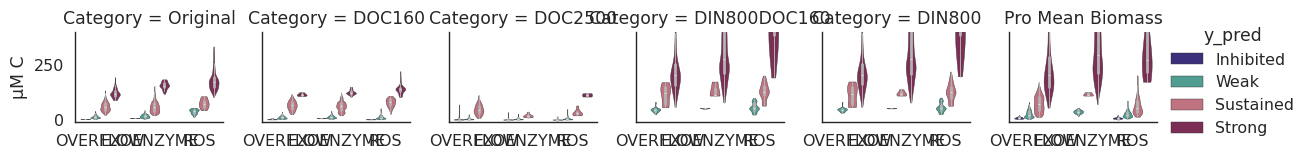

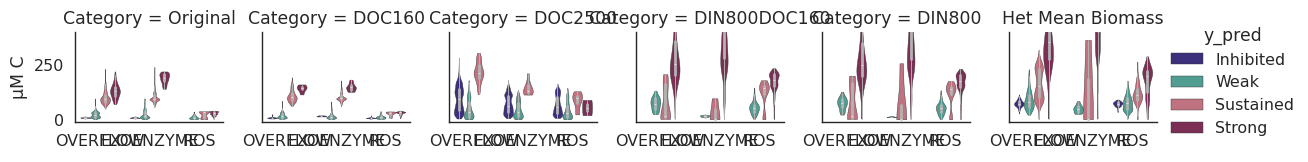

In [144]:
sns.set_context('paper', font_scale=1.3)
for c,t in zip(
    ['Integrated C Biomassp', 'Integrated C Biomassh', 
     #'Integrated C Biomass', 
    ],
    ['Pro Mean Biomass', 'Het Mean Biomass', #'Total Yield', 
    ],
):
    g = sns.catplot(
        data=comb_df.loc[~comb_df.y_pred.isin(['Axenic', 'Other'])& comb_df.Phase.isin(['init', 'extend'])],
         y=c, 
        hue='y_pred', hue_order=list(reversed(gorder1)), palette=list(reversed(gpalette1)),
        x='model', order=morder,
        col='Category', col_order=media_order, #sharex=False,
        kind='violin', #split=True,
        #aspect=2.2,
        linewidth=0.3, 
        height=2,
        #split=True,
        common_norm=False, cut=0,density_norm='width',
        #inner='quart',
         #inner_kws=dict(box_width=7, whis_width=1, color=".7", linewidth=0.5, ),
         inner_kws=dict( box_width=2, color=".7", ),
       # legend=False,
    )
    #if c == 'Final Organic C':
    g.set(ylim=(-10,400), ylabel=f'µM C', xlabel='')
        
    #g.set(#ylim=(5e-2,20),
    #      yscale='log')
    #plt.axhline(1,lw=1, ls='--')
    plt.title(t)
    plt.show()
    save_fpath = os.path.join(save_dpath, f'sup_{t}.svg')
    g.savefig(save_fpath, format='svg', dpi=1200)


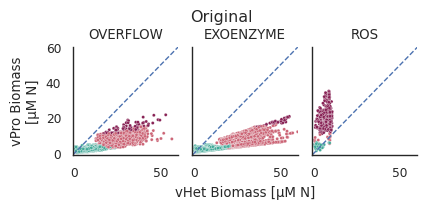

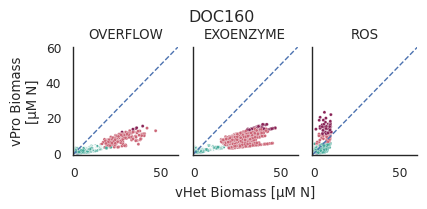

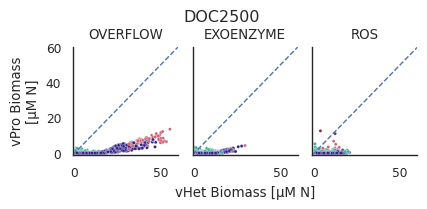

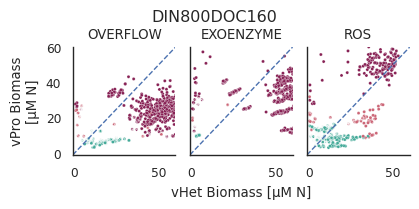

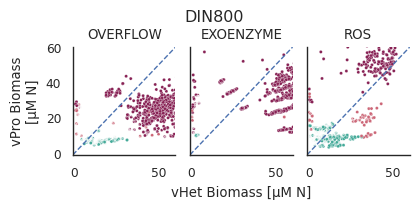

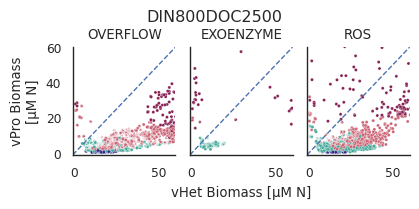

In [148]:
sns.set_context('paper') #, font_scale=1.3)
for cat in media_order:
    g = sns.relplot(
        data=comb_df.loc[~comb_df.y_pred.isin(['Axenic', 'Other']) & comb_df.Phase.isin(['init', 'extend']) & 
        #    comb_df.Versatile & 
        comb_df.Category.isin([cat])],
         y='Integrated N Biomassp', x='Integrated N Biomassh',
        hue='y_pred', hue_order=gorder1, palette=gpalette1,
        col='model', col_order=morder, s=5,
        #row='Category', row_order=media_order[1:],
        legend=False, aspect=0.7, height=2,rasterized=True,
        facet_kws=dict(margin_titles=True),
    )
    g.set_titles(col_template='{col_name}', row_template='{row_name}')
    for col_val, ax in g.axes_dict.items():
        ax.axline((0,0), (20,20),lw=1, ls='--')
    
    g.set(ylabel='vPro Biomass\n[µM N]', xlabel='vHet Biomass [µM N]', 
          xlim=(-1,60), 
          ylim=(-1,60), 
         )
    g.axes_dict['OVERFLOW'].set(xlabel='')
    g.axes_dict['ROS'].set(xlabel='')
    plt.suptitle(cat,y=1.02)
#save_fpath = os.path.join(save_dpath, 'fig_4_biomass_pro_vs_het.svg')
#g.savefig(save_fpath, format='svg', dpi=1200)


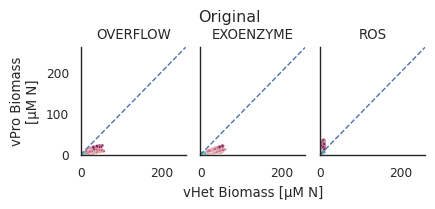

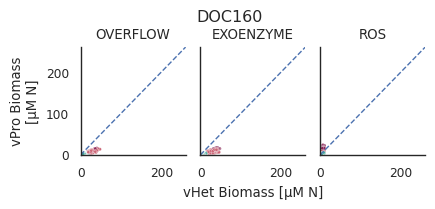

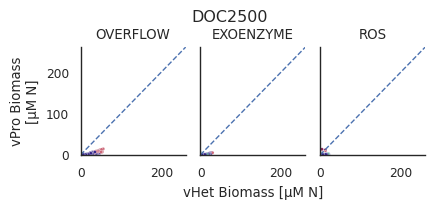

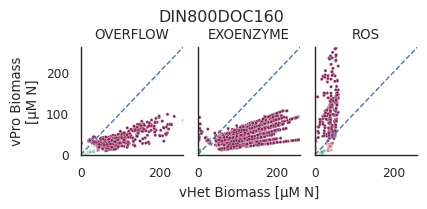

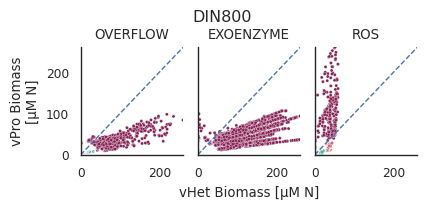

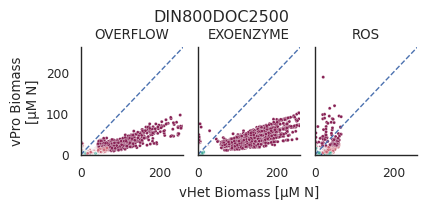

In [149]:
sns.set_context('paper') #, font_scale=1.3)
for cat in media_order:
    g = sns.relplot(
        data=comb_df.loc[~comb_df.y_pred.isin(['Axenic', 'Other']) & comb_df.Phase.isin(['init', 'extend']) & 
        #    comb_df.Versatile & 
        comb_df.Category.isin([cat])],
         y='Integrated N Biomassp', x='Integrated N Biomassh',
        hue='y_pred', hue_order=gorder1, palette=gpalette1,
        col='model', col_order=morder, s=5,
        #row='Category', row_order=media_order[1:],
        legend=False, aspect=0.7, height=2,rasterized=True,
        facet_kws=dict(margin_titles=True),
    )
    g.set_titles(col_template='{col_name}', row_template='{row_name}')
    for col_val, ax in g.axes_dict.items():
        ax.axline((0,0), (20,20),lw=1, ls='--')
    
    g.set(ylabel='vPro Biomass\n[µM N]', xlabel='vHet Biomass [µM N]', 
          xlim=(-1,260), 
          ylim=(-1,260), 
         )
    g.axes_dict['OVERFLOW'].set(xlabel='')
    g.axes_dict['ROS'].set(xlabel='')
    plt.suptitle(cat,y=1.02)
#save_fpath = os.path.join(save_dpath, 'fig_4_biomass_pro_vs_het.svg')
#g.savefig(save_fpath, format='svg', dpi=1200)


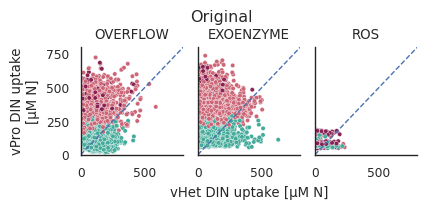

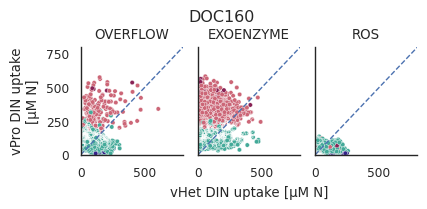

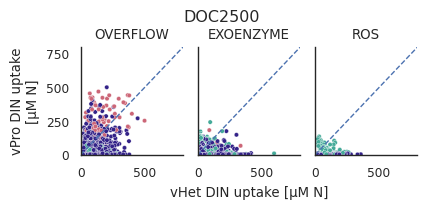

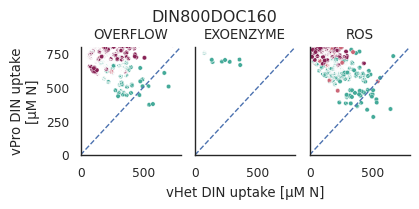

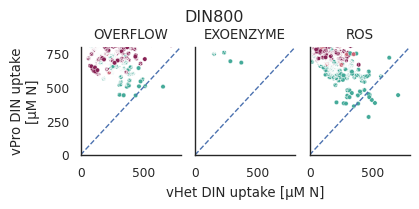

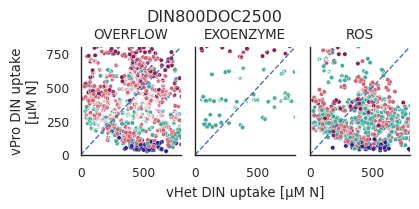

In [155]:
sns.set_context('paper') #, font_scale=1.3)
for cat in media_order:
    g = sns.relplot(
        data=comb_df.loc[~comb_df.y_pred.isin(['Axenic', 'Other']) & comb_df.Phase.isin(['init', 'extend']) & 
        #    comb_df.Versatile & 
        comb_df.Category.isin([cat])],
         y='Integrated Uptake INp', x='Integrated Uptake INh',
        hue='y_pred', hue_order=gorder1, palette=gpalette1,
        col='model', col_order=morder, s=10,
        #row='Category', row_order=media_order[1:],
        legend=False, aspect=0.7, height=2,rasterized=True,
        facet_kws=dict(margin_titles=True),
    )
    g.set_titles(col_template='{col_name}', row_template='{row_name}')
    for col_val, ax in g.axes_dict.items():
        ax.axline((0,0), (20,20),lw=1, ls='--')
    
    g.set(ylabel='vPro DIN uptake\n[µM N]', xlabel='vHet DIN uptake [µM N]', 
          xlim=(-1,800), 
          ylim=(-1,800), 
         )
    g.axes_dict['OVERFLOW'].set(xlabel='')
    g.axes_dict['ROS'].set(xlabel='')
    plt.suptitle(cat,y=1.02)
#save_fpath = os.path.join(save_dpath, 'fig_4_biomass_pro_vs_het.svg')
#g.savefig(save_fpath, format='svg', dpi=1200)


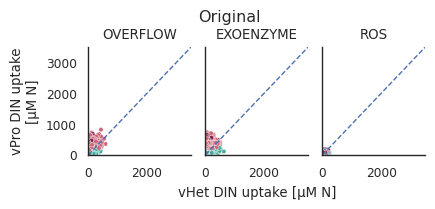

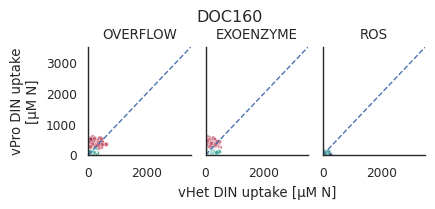

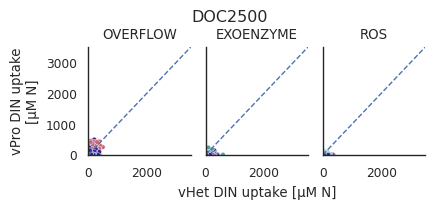

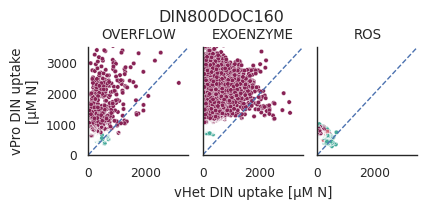

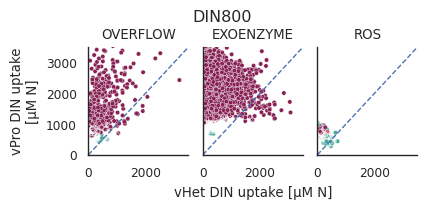

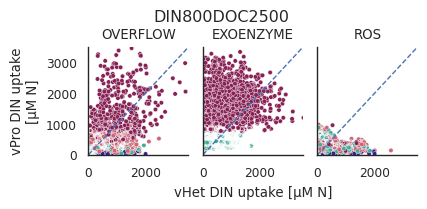

In [156]:
sns.set_context('paper') #, font_scale=1.3)
for cat in media_order:
    g = sns.relplot(
        data=comb_df.loc[~comb_df.y_pred.isin(['Axenic', 'Other']) & comb_df.Phase.isin(['init', 'extend']) & 
        #    comb_df.Versatile & 
        comb_df.Category.isin([cat])],
         y='Integrated Uptake INp', x='Integrated Uptake INh',
        hue='y_pred', hue_order=gorder1, palette=gpalette1,
        col='model', col_order=morder, s=10,
        #row='Category', row_order=media_order[1:],
        legend=False, aspect=0.7, height=2,rasterized=True,
        facet_kws=dict(margin_titles=True),
    )
    g.set_titles(col_template='{col_name}', row_template='{row_name}')
    for col_val, ax in g.axes_dict.items():
        ax.axline((0,0), (20,20),lw=1, ls='--')
    
    g.set(ylabel='vPro DIN uptake\n[µM N]', xlabel='vHet DIN uptake [µM N]', 
          xlim=(-1,3500), 
          ylim=(-1,3500), 
         )
    g.axes_dict['OVERFLOW'].set(xlabel='')
    g.axes_dict['ROS'].set(xlabel='')
    plt.suptitle(cat,y=1.02)
#save_fpath = os.path.join(save_dpath, 'fig_4_biomass_pro_vs_het.svg')
#g.savefig(save_fpath, format='svg', dpi=1200)


In [157]:
from scipy.stats import pearsonr, spearmanr
for cat in media_order:
    for m in morder:
        
        data=comb_df.loc[~comb_df.y_pred.isin(['Axenic', 'Other']) & comb_df.Phase.isin(['init', 'extend']) & #comb_df.Versatile & 
        comb_df.model.isin([m]) 
            &comb_df.Category.isin([cat])]
        i = pearsonr(data['Integrated C Biomassp'],data['Integrated C Biomassh'])
        print(cat, m, data.shape[0], np.round(i[0], 2), i[1])


Original OVERFLOW 11963 0.86 0.0
Original EXOENZYME 8847 0.77 0.0
Original ROS 605 0.45 3.8613207137814998e-31
DOC160 OVERFLOW 4715 0.78 0.0
DOC160 EXOENZYME 5373 0.79 0.0
DOC160 ROS 2037 0.63 9.334895086175107e-223
DOC2500 OVERFLOW 2990 0.65 0.0
DOC2500 EXOENZYME 2431 0.11 2.0660310841512242e-08
DOC2500 ROS 1710 -0.04 0.07195432117814521
DIN800DOC160 OVERFLOW 3383 0.8 0.0
DIN800DOC160 EXOENZYME 4587 0.77 0.0
DIN800DOC160 ROS 1952 0.69 4.0455606794418816e-280
DIN800 OVERFLOW 3370 0.8 0.0
DIN800 EXOENZYME 4651 0.75 0.0
DIN800 ROS 1934 0.69 1.2891778832641387e-278
DIN800DOC2500 OVERFLOW 3313 0.86 0.0
DIN800DOC2500 EXOENZYME 3222 0.85 0.0
DIN800DOC2500 ROS 1785 0.41 4.9596644620257356e-74


In [47]:
comb_df['Het/Pro C yield'] = comb_df['Integrated C Biomassh'].div(comb_df['Integrated C Biomassp'])


In [48]:
media_order_noDIN800 = ['DOC160', 'DOC2500', 'DIN800DOC160', #'DIN800',
                        'DIN800DOC2500']

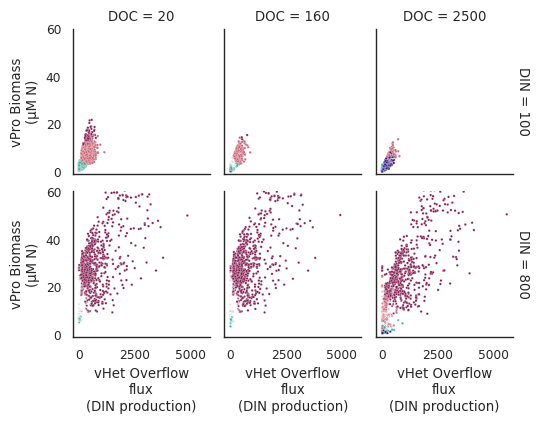

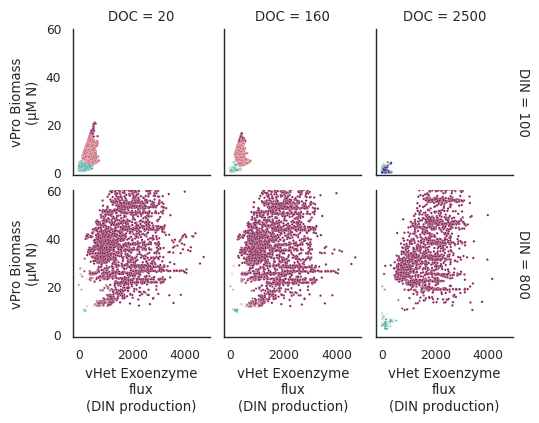

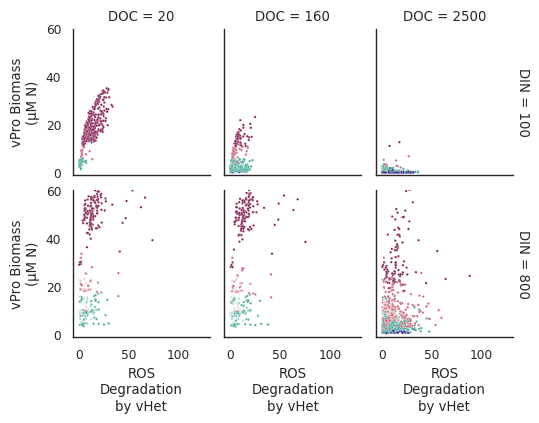

In [162]:
import colorcet 
sns.set_context('paper') #, font_scale=1.3)
#fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(2,5), sharex=False, sharey=True, ) #, facecolor="#F0F0F0")
for i, (m, c,xlabel) in enumerate(zip(['OVERFLOW', 'EXOENZYME', 'ROS', ], 
                [ 'Integrated overflowNh','Integrated DON2DIN_exoh','Integrated ROSlossh', ], 
                [ 'vHet Overflow\nflux\n(DIN production)','vHet Exoenzyme\nflux\n(DIN production)','ROS\nDegradation\nby vHet', ], 
               )):
    g = sns.relplot(
        data=comb_df.loc[~comb_df.y_pred.isin(['Axenic', 'Other']) & comb_df.Phase.isin(['init', 'extend']) & comb_df.model.isin([m]) #& #comb_df.Versatile
        ],
         x=c, y='Integrated N Biomassp',
        hue='y_pred', hue_order=gorder1, palette=gpalette1,
        col='DOC', row='DIN',
        s=3,
        legend=False, aspect=0.9, height=2, rasterized=True,
        facet_kws=dict(margin_titles=True)
    )
    #g.set_titles(col_template='{col_name}', row_template)
    # for col_val, ax in g.axes_dict.items():
    #     ax.axline((0,0), (20,20),lw=1, ls='--')
    
    g.set(ylabel='vPro Biomass\n(µM N)', xlabel=xlabel, 
      ylim=(-1,60), 
         )
    #if c != 'Integrated overflowNh':
    #    g.set(ylabel='', yticks=[])
    #save_fpath = os.path.join(save_dpath, f'fig_4_main_proc_{m}.svg')
    #g.savefig(save_fpath, format='svg', dpi=1200)
        

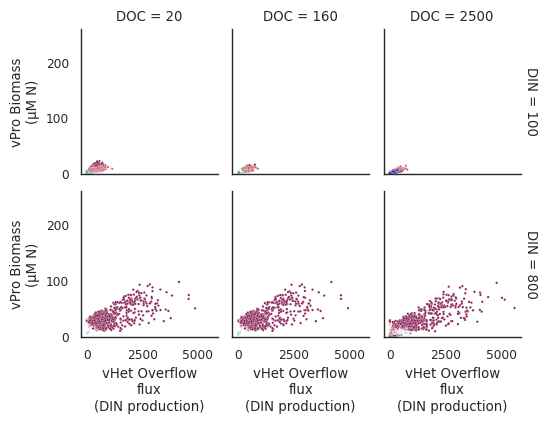

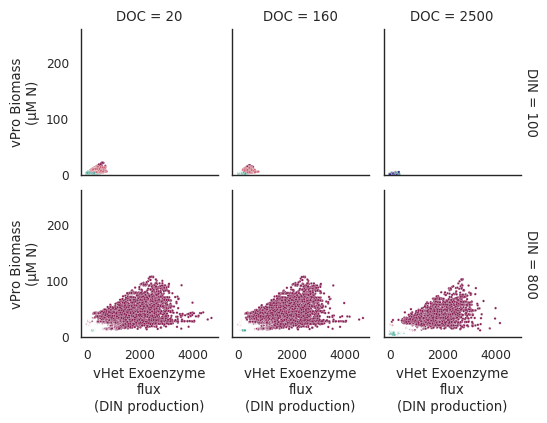

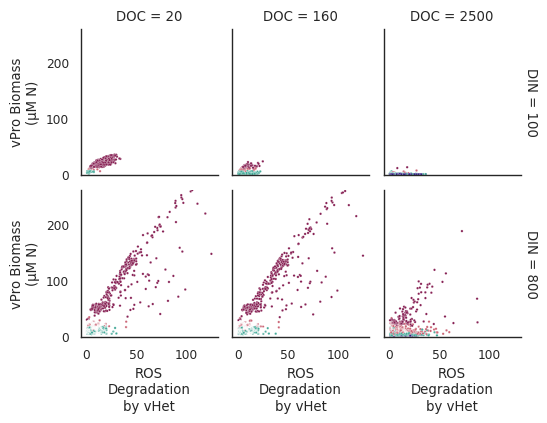

In [163]:
import colorcet 
sns.set_context('paper') #, font_scale=1.3)
#fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(2,5), sharex=False, sharey=True, ) #, facecolor="#F0F0F0")
for i, (m, c,xlabel) in enumerate(zip(['OVERFLOW', 'EXOENZYME', 'ROS', ], 
                [ 'Integrated overflowNh','Integrated DON2DIN_exoh','Integrated ROSlossh', ], 
                [ 'vHet Overflow\nflux\n(DIN production)','vHet Exoenzyme\nflux\n(DIN production)','ROS\nDegradation\nby vHet', ], 
               )):
    g = sns.relplot(
        data=comb_df.loc[~comb_df.y_pred.isin(['Axenic', 'Other']) & comb_df.Phase.isin(['init', 'extend']) & comb_df.model.isin([m]) #& #comb_df.Versatile
        ],
         x=c, y='Integrated N Biomassp',
        hue='y_pred', hue_order=gorder1, palette=gpalette1,
        col='DOC', row='DIN',
        s=3,
        legend=False, aspect=0.9, height=2, rasterized=True,
        facet_kws=dict(margin_titles=True)
    )
    #g.set_titles(col_template='{col_name}', row_template)
    # for col_val, ax in g.axes_dict.items():
    #     ax.axline((0,0), (20,20),lw=1, ls='--')
    
    g.set(ylabel='vPro Biomass\n(µM N)', xlabel=xlabel, 
      ylim=(-1,260), 
         )
    #if c != 'Integrated overflowNh':
    #    g.set(ylabel='', yticks=[])
    #save_fpath = os.path.join(save_dpath, f'fig_4_main_proc_{m}.svg')
    #g.savefig(save_fpath, format='svg', dpi=1200)
        

In [53]:
pca_data_cols_full = [
    
 'Final RDON',
 'Final RDOC',
 'Final DON',
 'Final DOC',
 'Total N uptake',
 'N reuse',
 'Final Organic C',
 #'Integrated N uptake',
 'Integrated C Biomassp',
 'Integrated C Biomassh',
 'Integrated N Biomassp',
 'Integrated N Biomassh',
 'Carbon Use Efficiency',
    'Integrated Uptake ICp',
]

pca_data_cols = [
    
 'Final RDON',
 'Final RDOC',
 'Total N uptake',
 #'N reuse',
 'Final Organic C',
 #'Integrated N uptake',
 'Integrated C Biomassp',
 'Integrated C Biomassh',
 #'Integrated N Biomassp',
 #'Integrated N Biomassh',
 #'Carbon Use Efficiency',
    'Integrated Uptake ICp',
]

In [54]:
core_df = comb_df.loc[comb_df.y_pred.isin(gorder1)& comb_df.Phase.isin(['init', 'extend']) & comb_df.Versatile & comb_df.model.isin(morder)]


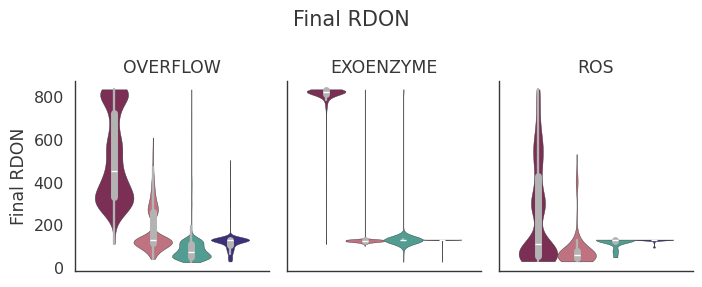

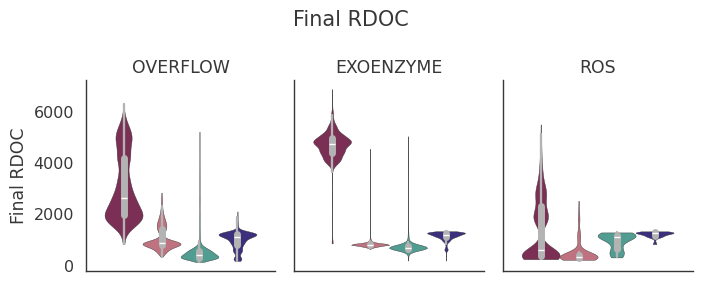

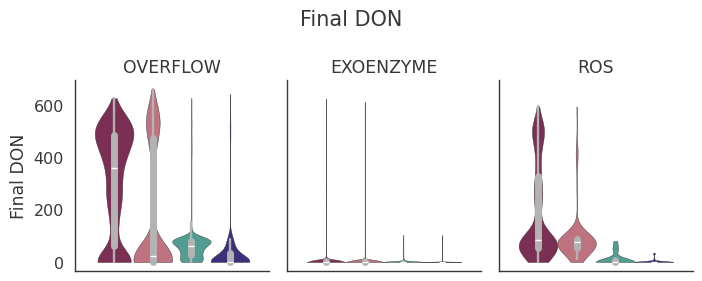

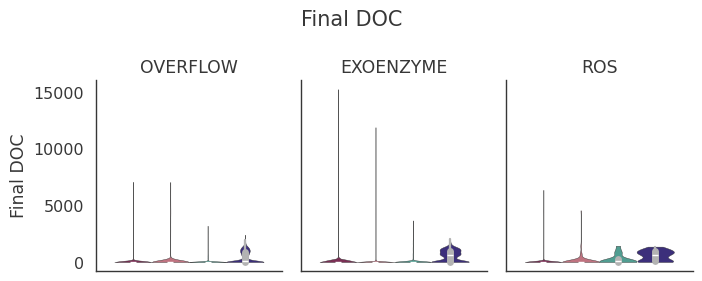

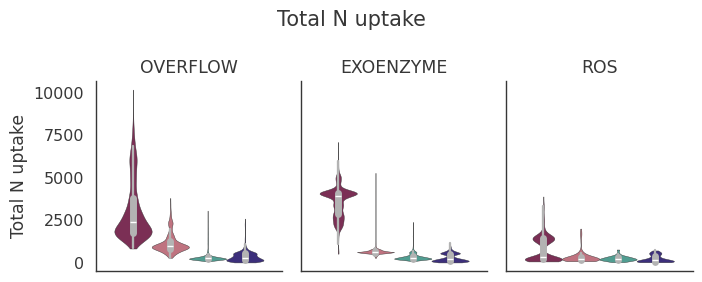

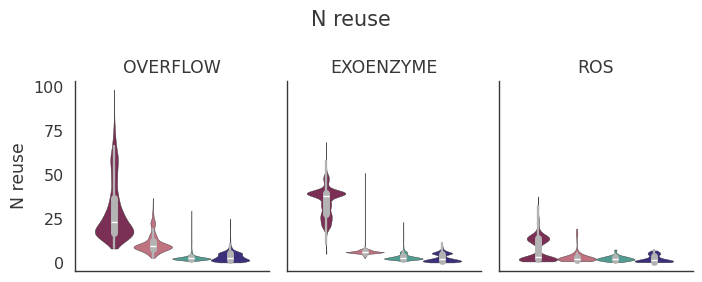

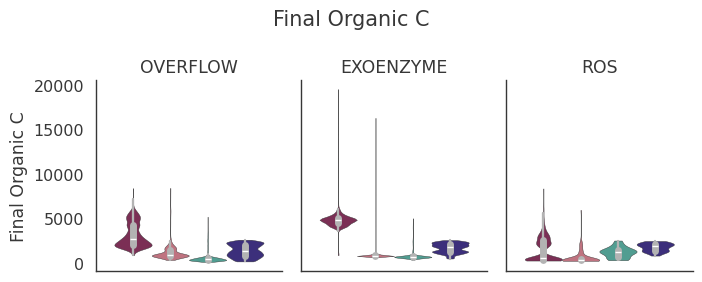

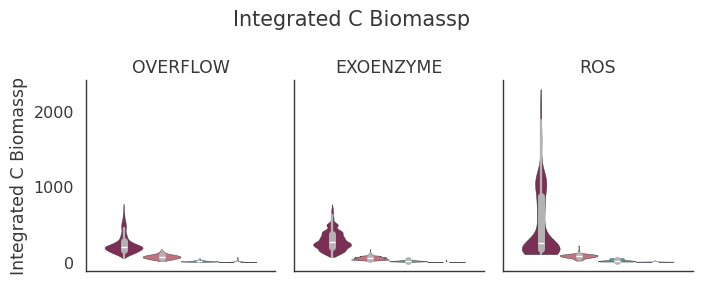

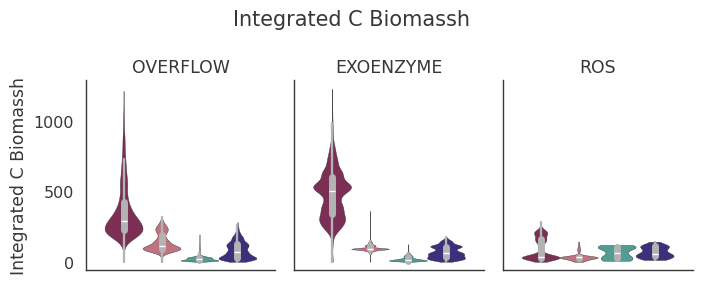

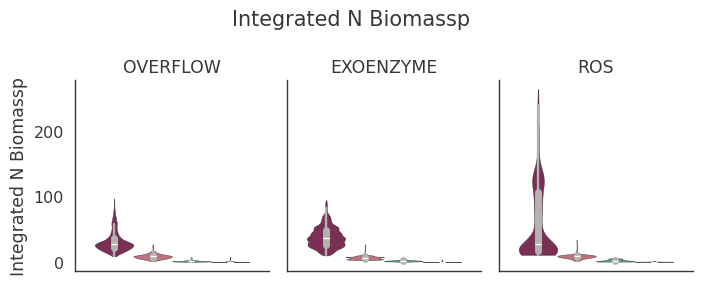

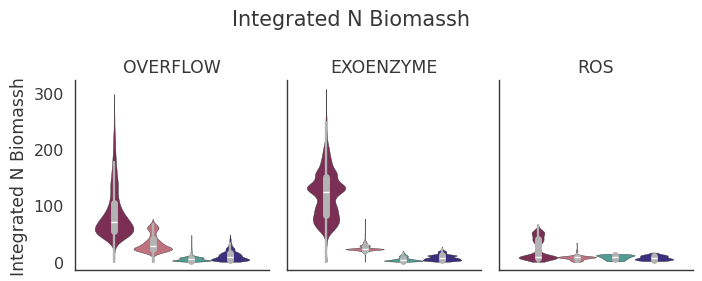

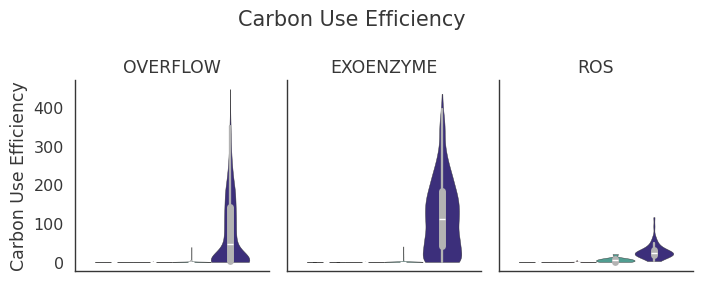

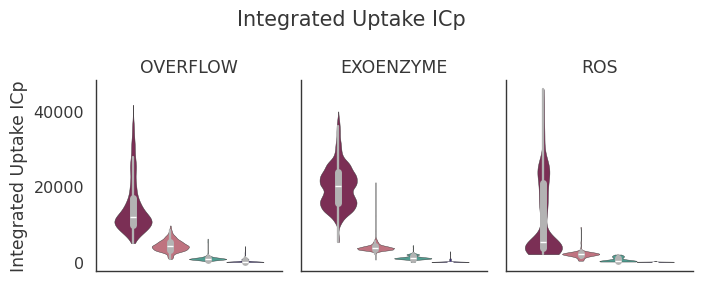

In [55]:
sns.set_context('paper', font_scale=1.3)
for c in pca_data_cols_full:
    g = sns.catplot(
        data=core_df,
         y=c, 
        hue='y_pred', hue_order=gorder1, palette=gpalette1,
        x='model', #order=morder,
        col='model', col_order=morder, sharex=False,
        kind='violin', #split=True,
        aspect=0.8,
        linewidth=0.3, 
        height=3,
        #split=True,
        common_norm=False, cut=0, density_norm='width',
        #inner='quart',
         #inner_kws=dict(box_width=7, whis_width=1, color=".7", linewidth=0.5, ),
         inner_kws=dict( box_width=5, color=".7", ),
        legend=False,
    )
    g.set_titles(col_template='{col_name}')
    g.set(xticks=[], xlabel='')
    #g.set(#ylim=(5e-2,20),
    #      yscale='log')
    #plt.axhline(1,lw=1, ls='--')
    plt.suptitle(c, y=1.1)
    plt.show()

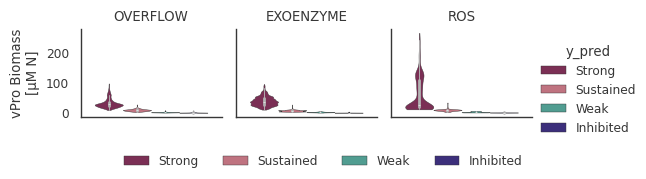

In [56]:
sns.set_context('paper', font_scale=1)
for c in ['Integrated N Biomassp']:
    g = sns.catplot(
        data=core_df,
         y=c, 
        hue='y_pred', hue_order=gorder1, palette=gpalette1,
        x='model', # dodge=False,order=gorder1,
        col='model', col_order=morder, sharex=False,
        kind='violin', #split=True,
        aspect=1,
        linewidth=0.3, 
        height=1.8,
        #split=True,
        common_norm=False, cut=0, density_norm='width',
        #inner='quart',
         #inner_kws=dict(box_width=7, whis_width=1, color=".7", linewidth=0.5, ),
         inner_kws=dict( box_width=2, color=".7", ),
        #legend=False,
    )
    g.set_titles(col_template='{col_name}')
    g.set(xticks=[],
          xlabel='', ylabel='vPro Biomass\n[µM N]')
    #g.set(#ylim=(5e-2,20),
    #      yscale='log')
    #plt.axhline(1,lw=1, ls='--')
    #plt.suptitle('vPro Biomass', y=1.1)
    parent_mpl_figure = g.fig
    parent_mpl_figure.legend(loc='lower center', ncols=4, frameon=False)
    plt.show()

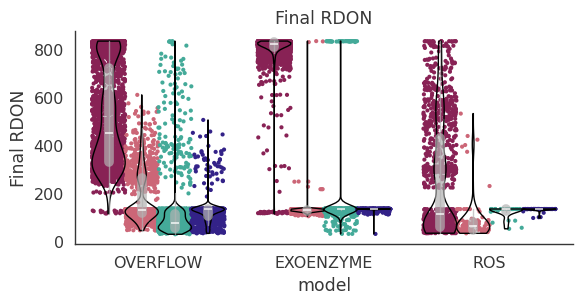

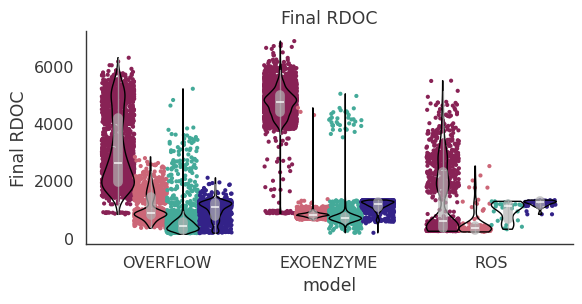

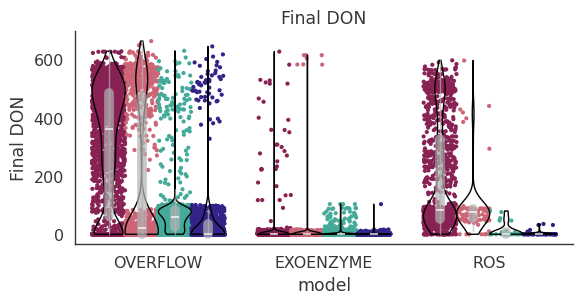

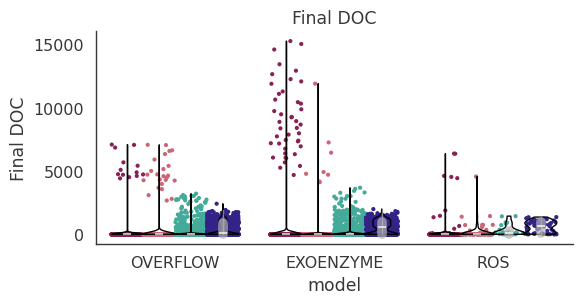

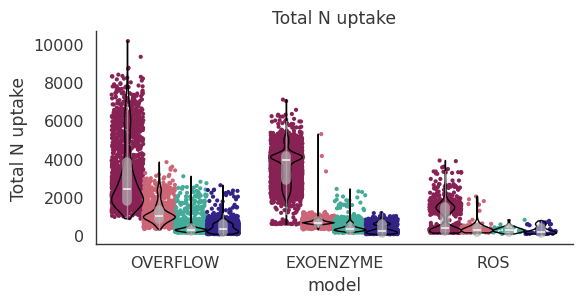

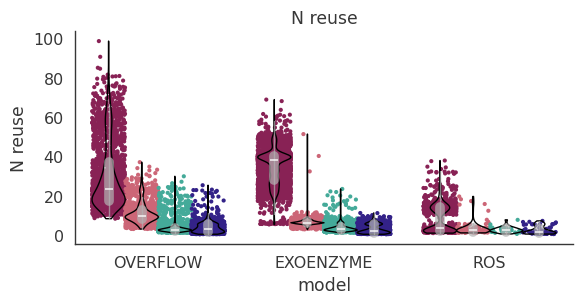

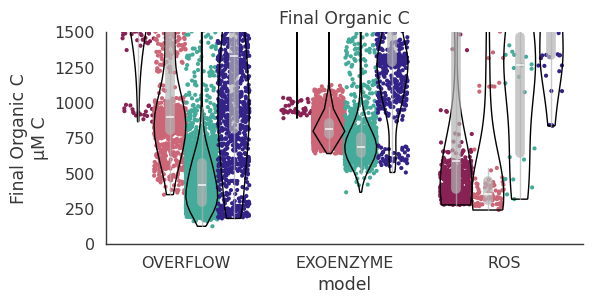

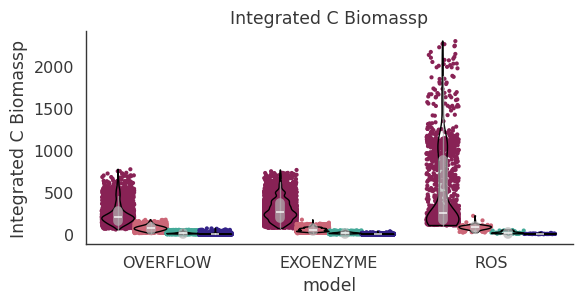

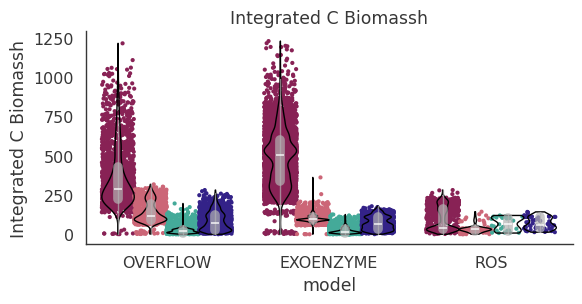

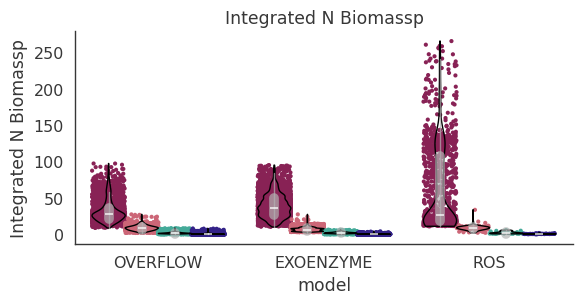

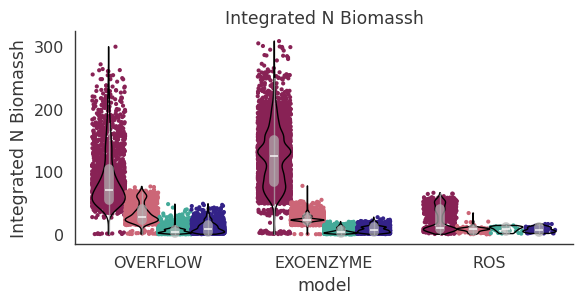

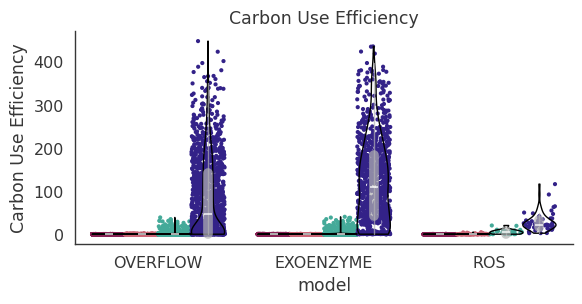

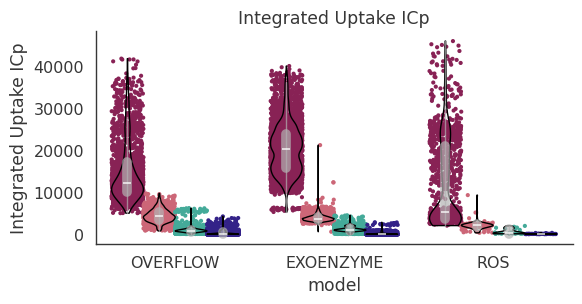

In [57]:
sns.set_context('paper', font_scale=1.3)
for c in pca_data_cols_full:
    g = sns.catplot(
        data=core_df,
        #data=core_df,
         y=c, 
        hue='y_pred', hue_order=gorder1, 
        #palette=gpalette1,
        palette=['black','black','black','black',],
        x='model', order=morder,
        kind='violin', #split=True,
        aspect=2,
        linewidth=1, 
        height=3,
        #size=4, dodge=True, jitter=0.5,
        #split=True,
        common_norm=False, cut=0, density_norm='width',
        fill=None,
        #inner='quart',
         inner_kws=dict(box_width=7, whis_width=1, color=".7", linewidth=0.5, alpha=0.7),
        #log_scale=True,
         #inner_kws=dict( box_width=5, color=".7", ),
        linecolor='grey',
        legend=False,
    )
    sns.stripplot(
        data=core_df,
         y=c, 
        hue='y_pred', hue_order=gorder1, palette=gpalette1,
        x='model', order=morder,
        size=3, dodge=True, jitter=0.4, zorder=-100,
        legend=False,
    )
    if c == 'Final Organic C':
        g.set(ylim=(0,1500), ylabel=f'{c}\nµM C')
    
    #g.set(ylabel=stage)
    #g.set(#ylim=(5e-2,20),
    #      yscale='log')
    #plt.axhline(1,lw=1, ls='--')
    plt.title(c)
    plt.show()

In [58]:
pca_data_cols_full
final_figure_cols = ['Final RDOC','N reuse','Carbon Use Efficiency','Final Organic C',]
final_figure_titles = ['Final Recalcitrant DOC','N Reuse','Carbon Use Efficiency','Final Organic C',]
final_figure_ylabel = ['µM C','N Reuse','Carbon Use Efficiency','µM C',]


In [59]:
final_figure_ylim = [(0,1500), (-3,20), (-0.1,1.1), (0,1500)]

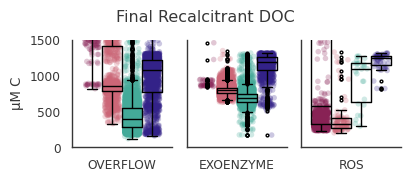

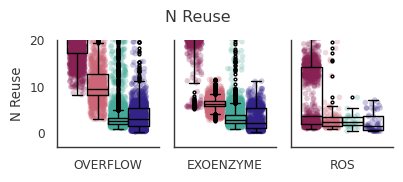

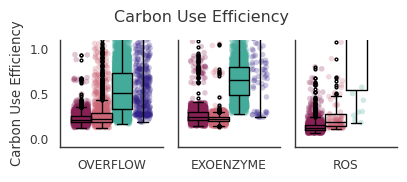

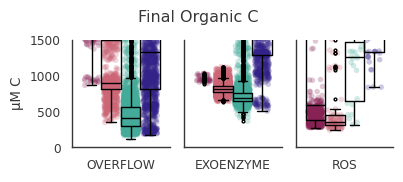

In [60]:
sns.set_context('paper', font_scale=1)
for c,title,ylabel, ylim in zip(final_figure_cols, final_figure_titles, final_figure_ylabel, final_figure_ylim):
    g = sns.catplot(
        data=core_df,
        #data=core_df,
         y=c, 
        hue='y_pred', hue_order=gorder1, 
        #palette=gpalette1,
        palette=['black','black','black','black',],
        x='model', #order=morder,
        col='model', col_order=morder, sharex=False,
        kind='box', #split=True,
        aspect=0.7,
        linewidth=1, 
        height=2, 
        #size=4, dodge=True, jitter=0.5,
        #split=True,
        #common_norm=False, cut=0, density_norm='width',
        fill=None,
        #inner='quart',
        # inner_kws=dict(box_width=7, whis_width=1, color=".7", linewidth=0.5, alpha=0.7),
        #log_scale=True,
         #inner_kws=dict( box_width=5, color=".7", ),
        linecolor='grey',
        legend=False,
        flierprops=dict(markersize=2,)
    )
    g.map_dataframe(sns.stripplot,
        data=core_df,
         y=c, 
        hue='y_pred', hue_order=gorder1, palette=gpalette1,
        x='model', #order=morder,
        size=4, dodge=True, jitter=0.3, zorder=-100, alpha=0.25,
        legend=False, rasterized=True,
    )
    if c == 'Final Organic C' or c== 'Final RDOC':
        g.set(ylim=(0,1500)) # , ylabel=f'{c}\nµM C')
    
    g.set(ylabel=ylabel, title='', ylim=ylim,
          xlabel='')
    #g.set(#ylim=(5e-2,20),
    #      yscale='log')
    #plt.axhline(1,lw=1, ls='--')
    plt.suptitle(title)
    plt.show()
    save_fpath = os.path.join(save_dpath, f'fig_4_biomass_{title}_box.svg')
    g.savefig(save_fpath, format='svg', dpi=1200)


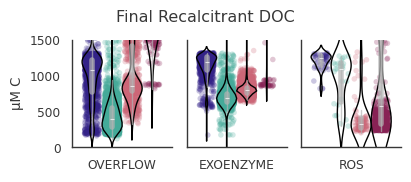

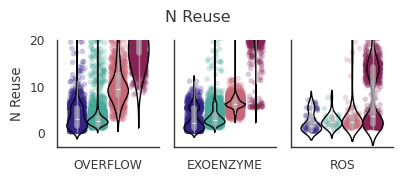

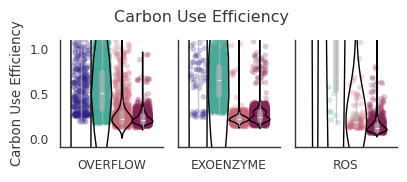

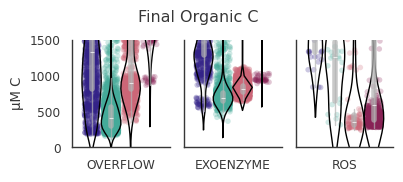

In [61]:
sns.set_context('paper', font_scale=1)
for c,title,ylabel, ylim in zip(final_figure_cols, final_figure_titles, final_figure_ylabel, final_figure_ylim):
    g = sns.catplot(
        data=core_df,
        #data=core_df,
         y=c, 
        hue='y_pred', hue_order=list(reversed(gorder1)), 
        #palette=gpalette1,
        palette=['black','black','black','black',],
        x='model', #order=morder,
        col='model', col_order=morder, sharex=False,
        kind='violin', #split=True,
        aspect=0.7,
        linewidth=1, 
        height=2, 
        #size=4, dodge=True, jitter=0.5,
        #split=True,
        #common_norm=False, cut=0, density_norm='width',
        fill=None,
        #inner='quart',
         inner_kws=dict(box_width=4, whis_width=1, color=".7", linewidth=0.5, alpha=0.7),
        #log_scale=True,
         #inner_kws=dict( box_width=5, color=".7", ),
        linecolor='grey',
        legend=False,
        #flierprops=dict(markersize=2,)
    )
    g.map_dataframe(sns.stripplot,
        data=core_df,
         y=c, 
        hue='y_pred', hue_order=list(reversed(gorder1)), palette=list(reversed(gpalette1)),
        x='model', #order=morder,
        size=4, dodge=True, jitter=0.3, zorder=-100, alpha=0.25,
        #size=1, dodge=True, jitter=0.4, zorder=-100, alpha=0.5,
        legend=False, rasterized=True,
    )
    if c == 'Final Organic C' or c== 'Final RDOC':
        g.set(ylim=(0,1500)) # , ylabel=f'{c}\nµM C')
    
    g.set(ylabel=ylabel, title='', ylim=ylim,
          xlabel='')
    #g.set(#ylim=(5e-2,20),
    #      yscale='log')
    #plt.axhline(1,lw=1, ls='--')
    plt.suptitle(title)
    plt.show()
    save_fpath = os.path.join(save_dpath, f'fig_4_biomass_{title}_violin.svg')
    g.savefig(save_fpath)
    

In [62]:
gorder

['Strong', 'Sustained', 'Inhibited', 'Weak', 'Neutral', 'Other']

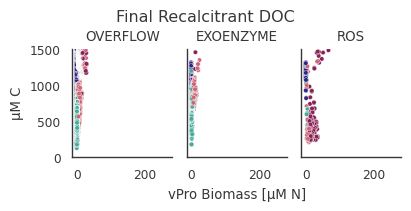

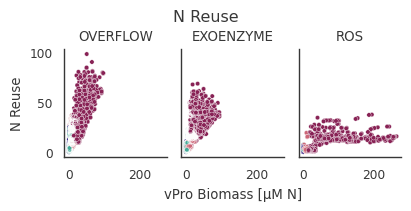

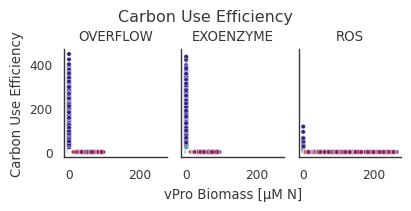

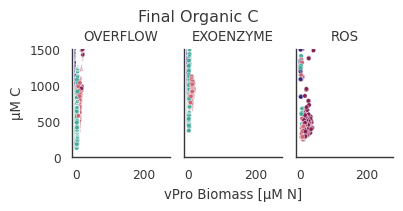

In [63]:
sns.set_context('paper') #, font_scale=1.3)
for c,title,ylabel, ylim in zip(final_figure_cols, final_figure_titles, final_figure_ylabel, final_figure_ylim):
    g = sns.relplot(
        data=comb_df.loc[~comb_df.y_pred.isin(['Axenic', 'Other']) & comb_df.Phase.isin(['init', 'extend']) & comb_df.Versatile],
         y=c, x='Integrated N Biomassp',
        hue='y_pred', hue_order=gorder1, palette=gpalette1,
        col='model', col_order=morder, s=10, #alpha=0.7,
        legend=False, aspect=0.7, height=2,rasterized=True,
    )
    g.set_titles(col_template='{col_name}')
    # for col_val, ax in g.axes_dict.items():
    #     ax.axline((0,0), (20,20),lw=1, ls='--')
    
    g.set(xlabel='vPro Biomass [µM N]', ylabel=ylabel, 
          #xlim=(-1,60), 
          #ylim=ylim, 
         )
    if c == 'Final Organic C' or c== 'Final RDOC':
        g.set(ylim=(0,1500)) # , ylabel=f'{c}\nµM C')
    g.axes_dict['OVERFLOW'].set(xlabel='')
    g.axes_dict['ROS'].set(xlabel='')
    plt.suptitle(title, y=1.03)
    save_fpath = os.path.join(save_dpath, f'fig_4_biomass_pro_vs_{title}.svg')
    g.savefig(save_fpath)


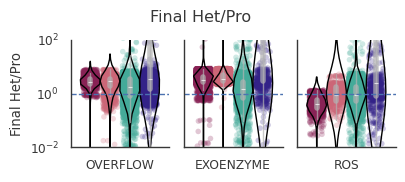

In [64]:
sns.set_context('paper', font_scale=1)
for c,title,ylabel, ylim in zip(['Final Het/Pro'], ['Final Het/Pro'], ['Final Het/Pro'], [(1e-2,1e2)]):
    g = sns.catplot(
        data=comb_df,
        #data=core_df,
         y=c, 
        hue='y_pred', hue_order=gorder1, 
        #palette=gpalette1,
        palette=['black','black','black','black',],
        x='model', #order=morder,
        col='model', col_order=morder, sharex=False,
        kind='violin', #split=True,
        aspect=0.7,
        linewidth=1, 
        height=2, 
        #size=4, dodge=True, jitter=0.5,
        #split=True,
        #common_norm=False, cut=0, density_norm='width',
        fill=None,
        #inner='quart',
         inner_kws=dict(box_width=4, whis_width=1, color=".7", linewidth=0.5, alpha=0.7),
        log_scale=True,
         #inner_kws=dict( box_width=5, color=".7", ),
        linecolor='grey',
        legend=False,
        #flierprops=dict(markersize=2,)
    )
    g.map_dataframe(sns.stripplot,
        data=core_df,
         y=c, 
        hue='y_pred', hue_order=gorder1, palette=gpalette1,
        x='model', #order=morder,
        size=4, dodge=True, jitter=0.3, zorder=-100, alpha=0.25,
        #size=1, dodge=True, jitter=0.4, zorder=-100, alpha=0.5,
        legend=False, rasterized=True,
    )
    if c == 'Final Organic C' or c== 'Final RDOC':
        g.set(ylim=(0,1500)) # , ylabel=f'{c}\nµM C')
    
    g.set(ylabel=ylabel, title='', ylim=ylim,
          xlabel='')
    #g.set(#ylim=(5e-2,20),
    #      yscale='log')
    for c,ax in g.axes_dict.items():
        ax.axhline(1,lw=1, ls='--')
    plt.suptitle(title)
    plt.show()
    save_fpath = os.path.join(save_dpath, f'fig_4_biomass_{title}_violin.svg')
    #g.savefig(save_fpath, format='svg', dpi=1200)
    

In [65]:
def get_next_unused_letter(columns):
    """
    Identify the next unused lowercase letter to use for compact lettering.
  
    Parameters:
    columns (list of strs): List of current column groups.

    Returns:
    str or None: Returns the next available lowercase letter, or None if all 26 letters are already used.
    """
    used_letters = set(letter for col in columns for letter in col if letter != '')
    
    # Iterate through the alphabet to find an unused letter.
    for letter in 'abcdefghijklmnopqrstuvwxyz':
        if letter not in used_letters:
            return letter
    
    # Return None if all letters are used (which should only happen with >26 columns).
    return None  

def absorb_columns(columns):
    """
    Absorbs redundant columns by comparing indices.

    Parameters:
    columns (list of strs): List of current column groups.

    Returns:
    list of strs: The processed list of column groups.
    """
    absorbed = True
    while absorbed:
        absorbed = False
        for i, col1 in enumerate(columns):
            for j, col2 in enumerate(columns):
                if i != j:
                    indices1 = {index for index, letter in enumerate(col1) if letter != ''}
                    indices2 = {index for index, letter in enumerate(col2) if letter != ''}
                    if indices1.issubset(indices2):
                        absorbed = True
                        columns.pop(i)
                        break
            if absorbed:
                break
    return columns

def compact_letter_display(significant_pairs, columns):
    """
    Generate compact letter display (CLD) for columns based on significant pairs.
    
    Parameters:
    significant_pairs (list of tuples): Significant pairs identified in a Tukey HSD test.
    columns (list of str): Columns in the DataFrame.

    Returns:
    list of str: The compact letter display representation.
    """
    num_groups = len(columns)

    # Map column names to indices.
    col_to_index = {col: idx for idx, col in enumerate(columns)}

    # Map significant pair names to indices.
    significant_pairs = [(col_to_index[col1], col_to_index[col2]) for col1, col2 in significant_pairs]


    columns = [['a'] * num_groups]
    for pair_idx, (i, j) in enumerate(significant_pairs):
        connected = False
        for idx, column in enumerate(columns):
            # When current pair have the same letter...
            if column[i] == column[j] and column[i] != '':
                connected = True
                new_letter = get_next_unused_letter(columns)
                new_column = column.copy() 
                new_column = [new_letter if column[i] != '' else '' for i in range(num_groups)]
                new_column[i] = ''
                column[j] = ''
                columns[idx] = column
                columns.append(new_column)
                columns = absorb_columns(columns)
            if connected:
                break 

    # Generate compact letter displays from the columns list.
    result = [''.join(columns[k][n] for k in range(len(columns)) if columns[k][n] != '') for n in range(num_groups)]
 
    return result

In [66]:
morder

['OVERFLOW', 'EXOENZYME', 'ROS']

In [67]:
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

for c in [ 
    #'Final RDON',
 'Final RDOC',
 #'Final DON',
 #'Final DOC',
 'Final Organic C',
 'N reuse',
 'Carbon Use Efficiency',
]:
    data=comb_df.loc[~comb_df.y_pred.isin(['Axenic', 'Other']) & comb_df.Phase.isin(['init', 'extend']) & comb_df.Versatile & comb_df.model.isin(morder)].copy()
    colnospace = c.replace(' ', '')
    data[colnospace] = data[c]
    data['model_y_pred'] = data['model'] + ' ' + data['y_pred']
    
    # Conduct one-way ANOVA
    print('####################################################################')
    print (c)
    model = ols(f'{colnospace} ~ C(model_y_pred)', data=data).fit()
    anova_table = sm.stats.anova_lm(model, typ=1)  # Type 1 ANOVA DataFrame
    print(anova_table)
    # Conduct Tukey's test
    tukey = pairwise_tukeyhsd(endog=data[colnospace], groups=data['model_y_pred'], alpha=0.05)
    groups_for_tucky = [f'{m} {y}' for m in morder for y in gorder1 if f'{m} {y}' in data.model_y_pred.values]
    
    print(tukey)
    print('####################################################################')
    pair_df = pd.DataFrame(data=tukey._results_table.data[1:], columns=tukey._results_table.data[0])
    significant_pairs = pair_df[pair_df['reject'] == True][['group1', 'group2']].values.tolist()
    #print (list(zip(groups_for_tucky,compact_letter_display(significant_pairs, groups_for_tucky))))
    print (c)
    print (groups_for_tucky)
    print (' '.join(compact_letter_display(significant_pairs, groups_for_tucky)))

    print('####################################################################')
    print('####################################################################')


####################################################################
Final RDOC
                      df        sum_sq       mean_sq            F  PR(>F)
C(model_y_pred)     14.0  6.819480e+10  4.871057e+09  5386.000078     0.0
Residual         37599.0  3.400425e+10  9.043923e+05          NaN     NaN
                 Multiple Comparison of Means - Tukey HSD, FWER=0.05                  
       group1              group2        meandiff  p-adj    lower      upper    reject
--------------------------------------------------------------------------------------
EXOENZYME Inhibited   EXOENZYME Neutral   500.6072    0.0    390.691   610.5234   True
EXOENZYME Inhibited    EXOENZYME Strong  3542.8534    0.0  3432.6834  3653.0234   True
EXOENZYME Inhibited EXOENZYME Sustained  -332.2396    0.0  -443.9271   -220.552   True
EXOENZYME Inhibited      EXOENZYME Weak  -391.4693    0.0  -510.4071  -272.5314   True
EXOENZYME Inhibited  OVERFLOW Inhibited  -170.4687 0.0013   -303.293   -37.6445   True
EX

KeyError: 'EXOENZYME Neutral'

In [ ]:
groups_for_tucky = [f'{m} {y}' for m in morder for y in gorder1 if f'{m} {y}' in data.model_y_pred.values]
groups_for_tucky

In [ ]:
pair_df = pd.DataFrame(data=tukey._results_table.data[1:], columns=tukey._results_table.data[0])
significant_pairs = pair_df[pair_df['reject'] == True][['group1', 'group2']].values.tolist()
significant_pairs
print (list(zip(groups_for_tucky,compact_letter_display(significant_pairs, groups_for_tucky))))


In [ ]:
tukey.reject

In [ ]:
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

for c in [ 
    'Final RDON',
 'Final RDOC',
 'Final DON',
 #'Final DOC',
 'Final Organic C',
 'N reuse',
 'Carbon Use Efficiency',
]:
    for m in morder:
        data=comb_df.loc[~comb_df.y_pred.isin(['Axenic', 'Other']) & comb_df.Phase.isin(['init', 'extend']) & comb_df.Versatile & comb_df.model.isin([m])].copy()
        colnospace = c.replace(' ', '')
        data[colnospace] = data[c]
        # Conduct one-way ANOVA
        print('####################################################################')
        print (m, c)
        model = ols(f'{colnospace} ~ C(y_pred)', data=data).fit()
        anova_table = sm.stats.anova_lm(model, typ=1)  # Type 1 ANOVA DataFrame
        print(anova_table)
        # Conduct Tukey's test
        tukey = pairwise_tukeyhsd(endog=data[colnospace], groups=data['y_pred'], alpha=0.05)
        print(tukey)
    print('####################################################################')
    print('####################################################################')
    print('####################################################################')


In [ ]:
corr_data_cols = [
    
 'Final RDON',
 'Final RDOC',
 'Final DON',
 'Final DOC',
 'N reuse',
 'Final Organic C',
 'Integrated C Biomassp',
 'Integrated C Biomassh',
 'Carbon Use Efficiency',
    'Integrated Uptake ICp',
]


In [ ]:
from scipy.stats import pearsonr, spearmanr, false_discovery_control
#corr_toremove = 
def _get_corr_matrix(comb_df, params_to_add, pca_cols, threshold=0.3, params_on_cols=False):
    rho = comb_df[params_to_add + pca_cols].corr(method='spearman')    
    pval = comb_df[params_to_add + pca_cols].corr(method=lambda x, y: spearmanr(x, y)[1]) - np.eye(*rho.shape)
    #pvaladj = pd.DataFrame(false_discovery_control(pval, axis=None), index=pval.index, columns=pval.columns)
    p = pval.map(lambda x: ''.join(['*' for t in [.05, .01, .001] if x<=t]))
    rho_text = rho.round(1).astype(str) +'\n'+ p    
    rho1 = rho[np.abs(rho[pca_cols]).ge(threshold).sum(axis=1).ge(1)]
    rho2 = rho1[rho1.index]
    if params_on_cols:
        cols = [c for c in rho2.columns if c in params_to_add]
        index_list = [c for c in rho2.columns if c not in  params_to_add]
        rho2 = rho2.reindex(columns=cols, index=index_list)
    rho_text = rho_text.reindex(columns=rho2.columns, index=rho2.index)
        
    return (rho2, rho_text)

In [ ]:

for m in morder:
    data, annot = _get_corr_matrix(core_df.loc[core_df.model.isin([m])], [], corr_data_cols, threshold=0, params_on_cols=False)
    
    sns.clustermap(
        data,
        cmap='coolwarm', vmax=1, vmin=-1, #row_cluster=False, col_cluster=False,
        annot=annot, fmt="s", figsize=(7,7),
        cbar_pos=None,
                  )
    plt.suptitle(m)

In [ ]:
plt.rcParams